# ARCDAP-3 ESMValTool Worksheet 

---
## Module 2 (Solutions)
---

In [ ]:
# created by Gerald on 17 Jan 2020

# copy & paste the ESM_Worksheets folder into the ~/ESMValtool/ directory and open it there.

Welcome to Module 2 of the ESMValTool Worksheet designed for the hands-on sessions during the ARCDAP-3 workshop. Module 2 will involve running a recipe to calculate GCM mean state biases against ERA-Interim for precipitation flux (pr) and surface temperature (tas). Please only start this worksheet after you've completed Module 1 and 1+. 

Enter your details in the cell below:

In [ ]:
# Name: 
# Organisation: 
# GCMs used: 

In [4]:
#imports 

import numpy as np
import scipy as sp
import xarray as xr

from IPython.display import Image, display

import fnmatch # find match

import glob
from pprint import pprint
from pathlib import Path

## Task 2: Surface temperature and Precipitation biases

--- 
**Data and Scripts needed:** <br>
Model and Observation output: <br>
- 2 x CMIP6 Models + 1 x ERA-Interim <br>
- CMIP experiment: historical <br>
- Variables: tas, pr <br>
- Frequency: Monthly mean <br>

Recipe: *~/ESMValTool/esmvaltool/recipes/recipe_validation_CMIP6.yml*

---

The first step of every any model evaluation exercise, be it for global or regional climate models, is to assess the models’ ability to represent the historical mean climatic states. Two simple climate variables that are typically evaluated are the surface air temperatures and precipitation fluxes. CMIP6 “historical” experiments from the DECK suite of experiments are designed to assess a GCM’s ability to ability to accurately reproduce historical climate trends and variability, important indicators of a GCM’s suitability for use in climate projection studies.  

This exercise will involve the calculation of both annual and seasonal surface temperature (tas) and precipitation flux (pr) biases using the *“recipe_validation_CMIP6.yml”* recipe. You will work with the **CMIP6** and **ERA-Interim** .nc files you downloaded.

### T2.1 Create plots of mean yearly and seasonal surface air temperature biases from 1995 to 2014 for your GCM.

Compute the above by following these rough steps. Use again, the Jupyter code cells to run Unix commands as though as you are using the terminal by adding a ```!``` at the front. <br>

**Before you start, make sure that you are in the *~/ESMValTool* directory and have activated the esmvaltool environment.**

1. Inspect and edit this recipe yml’s file which is found in the same *~/ESMValTool/esmvaltool/recipes* folder to correctly include your assigned CMIP6 models. Remember that you can find information about the required "keys" in the .nc file names. 

In [1]:
!geany esmvaltool/recipes/recipe_validation_CMIP6.yml

2. We’ll run this recipe over a regional domain that covers Southeast Asia. Additionally, we'll linearly regrid the model data to a 1.5x1.5 deg grid. Edit the ```target_grid``` line and add the highlighted lines in the recipe file where the pre-processor is defined to do so: 

<img src='Images/Validation Domain.jpg'>

3. Check that the ```additional_datasets``` are set as ```ERA-Interim``` and similarly in the section ```scripts``` wherever you declare the ```observational_datasets```. 
4. Set all ```seasonal_analysis``` to ```true```. 
5. Only one of the two models you used will be compared against the ERA-Interim. This will be the ```control_model```. 
6. Set the ```variables``` to ```tas``` and ```pr```.

<img src='Images/Validation Variables.png'>

7. Once you’ve set the recipe up correctly, save it and run your esmvaltool programme as before in the cell below. 

In [ ]:
! esmvaltool -c config-user-example.yml 

8. Now, navigate to the directory containing the output from running this recipe in the same manner as you did for Task 1.2. in Module 1. 

**If you are getting an empty file or listing, check that you have entered the correct directory**. 

In [2]:
! ls esmvaltool_output/

recipe_cvdp_20191213_172749
recipe_cvdp_20191213_173441
recipe_cvdp_20191214_122333
recipe_cvdp_20200116_075447
recipe_python_20200117_070100
recipe_validation_CMIP6_20191213_221918
recipe_validation_CMIP6_20191214_020427
recipe_validation_CMIP6_20191214_022739
recipe_validation_CMIP6_20191214_023144
recipe_validation_CMIP6_20191215_230454
recipe_validation_CMIP6_20191215_230902
recipe_validation_CMIP6_20191216_044746_INDOPAC
recipe_validation_CMIP6_20191216_071113
recipe_validation_CMIP6_20191216_071431
recipe_validation_CMIP6_20191216_073610
recipe_validation_CMIP6_20191216_074228
recipe_validation_CMIP6_20191216_090333
recipe_validation_CMIP6_20191216_092147
recipe_validation_CMIP6_20191216_095212
recipe_validation_CMIP6_20191216_101648
recipe_validation_CMIP6_20191216_102142
recipe_validation_CMIP6_20200116_031130
recipe_validation_CMIP6_20200116_031207
recipe_validation_CMIP6_20200116_031243


In [11]:
home = str(Path.home())  #Your home directory

# Insert the sub-folder containing the recipe output into the ''
# e.g. dirname1='recipe_python_20200117_070100'
dirname1='recipe_validation_CMIP6_20200116_031243';  
# Full path of the folder containing the plots produced by the recipe 
dirname=home+'/ESMValTool/esmvaltool_output/'+ dirname1 +'/plots/validation_with_ERA-Interim/lat_lon/';

# List of .png image files in the dirname directory
listing = glob.glob(dirname+'Difference*tas*ERA-Interim.png')

pprint(listing)

['/home/arcdap/ESMValTool/esmvaltool_output/recipe_validation_CMIP6_20200116_031243/plots/validation_with_ERA-Interim/lat_lon/Difference_SON_lat_lon_tas_CAMS-CSM1-0_vs_ERA-Interim.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_validation_CMIP6_20200116_031243/plots/validation_with_ERA-Interim/lat_lon/Difference_JJA_lat_lon_tas_CAMS-CSM1-0_vs_ERA-Interim.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_validation_CMIP6_20200116_031243/plots/validation_with_ERA-Interim/lat_lon/Difference_alltime_lat_lon_tas_CAMS-CSM1-0_vs_ERA-Interim.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_validation_CMIP6_20200116_031243/plots/validation_with_ERA-Interim/lat_lon/Difference_DJF_lat_lon_tas_CAMS-CSM1-0_vs_ERA-Interim.png',
 '/home/arcdap/ESMValTool/esmvaltool_output/recipe_validation_CMIP6_20200116_031243/plots/validation_with_ERA-Interim/lat_lon/Difference_MAM_lat_lon_tas_CAMS-CSM1-0_vs_ERA-Interim.png']


#### **Paste your plots of the domain mean surface air temperature bias below:**

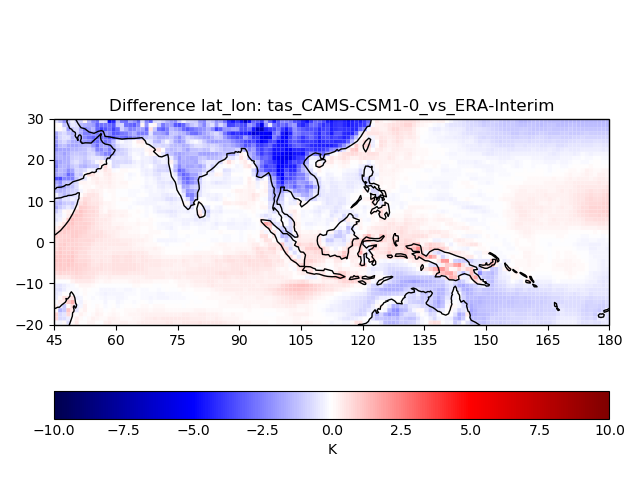

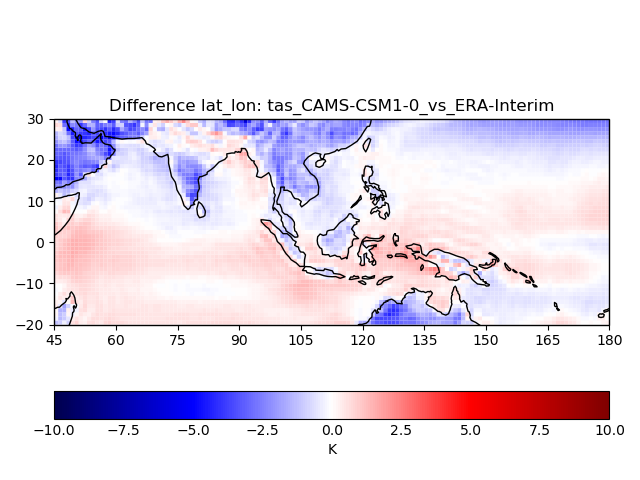

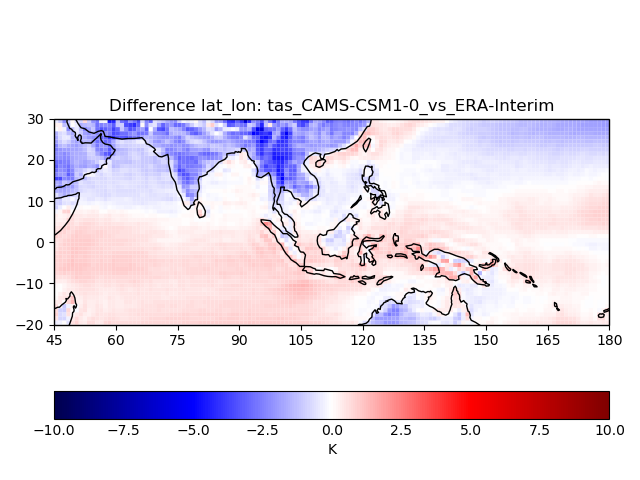

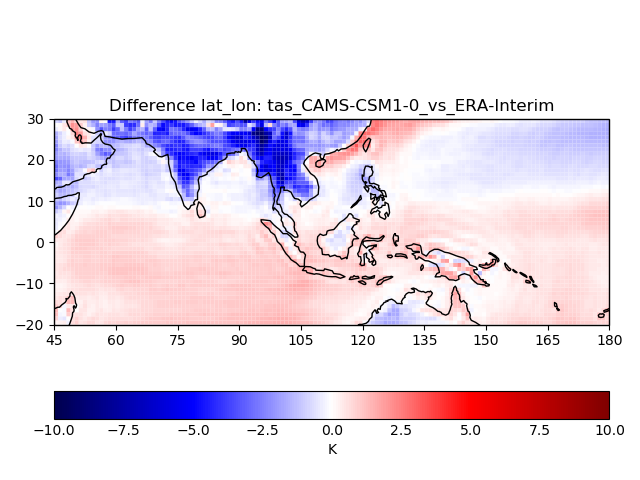

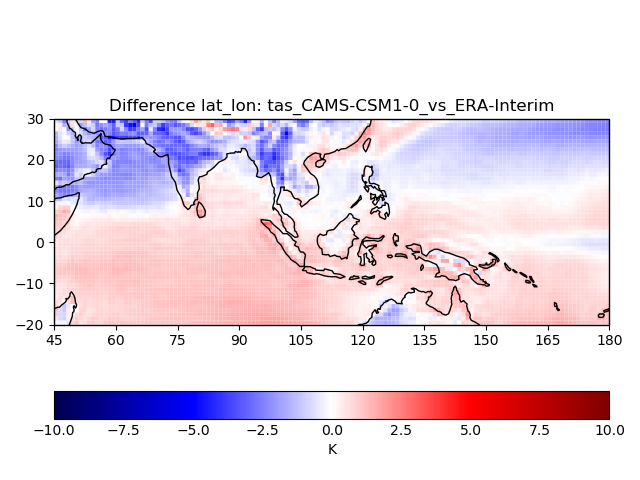

In [12]:
# Display the plots of mean tas bias:

for imageName in listing:
    display(Image(filename=imageName))
    

### T2.2. Repeat the above for your second GCM. (might not be needed if I edit the diag_script to do both plots at once)

In [ ]:
# Edit your recipe file 

In [ ]:
# Run ESMValTool

### T2.3. Calculate 1) the domain average surface air temperature biases for both and 2) the standard deviations of the biases of GCMs with respect to ERA-Interim

From Task 1 in Module 1 you should already know how to locate and process the output .nc files from ESMValTool. Refer back to the old code in T1.2. for help!

**Domain average tas bias (ANN):**

In [ ]:
# CMIP6 GCM 1 
print(np.mean())
print(np.std())

# CMIP6 GCM 2 
print(np.mean())
np.std()

**Domain average tas bias (DJF)**

In [ ]:
# CMIP6 GCM 1 
print(np.mean())
print(np.std())

# CMIP6 GCM 2 
print(np.mean())
np.std()

**Domain average tas bias (MAM):**

In [ ]:
# CMIP6 GCM 1 
print(np.mean())
print(np.std())

# CMIP6 GCM 2 
print(np.mean())
np.std()

**Domain average tas bias (JJA):**

In [ ]:
# CMIP6 GCM 1 
print(np.mean())
print(np.std())

# CMIP6 GCM 2 
print(np.mean())
np.std()

**Domain average tas bias (SON):**

In [ ]:
# CMIP6 GCM 1 
print(np.mean())
print(np.std())

# CMIP6 GCM 2 
print(np.mean())
np.std()

### T2.4. Briefly (no longer than a paragraph) summarise and describe your model results from 2.1-2.4

Some guiding points to consider: 
- How did the models represent historical surface air temperature in general? 
- Which model exhibited greater biases over the time period? How did biases vary across the seasons? Were there any notable differences? 
- How do the biases compare over different regions and domains? Are there any particularly biased areas? 
- Which model exhibited a greater spread of biases? What does this imply? 
- In what context is it more useful to consider seasonal biases as opposed to across the year? Consider what’s most relevant for the ASEAN region.|

**Answer:**

### T2.5. Locate and paste the plots of domain mean precipipation flux biases below, then repeat T2.3. and T2.4. for your analysis on the pr biases instead. 



---

In [ ]:
# end of file, Gerald, last edited 21/1/2020.